In [4]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [10]:
price_df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/maize.csv')

In [11]:
price_df

,Date,Prices
0,01-01-1990,105.900513
1,01-02-1990,106.294167
2,01-03-1990,109.837318
3,01-04-1990,118.498337
4,01-05-1990,121.254097
...,...,...
366,01-07-2020,152.587620
367,01-08-2020,149.393000
368,01-09-2020,166.602533
369,01-10-2020,186.766388


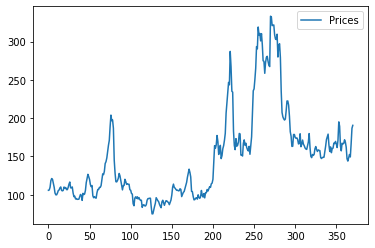

In [12]:
price_df.plot()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



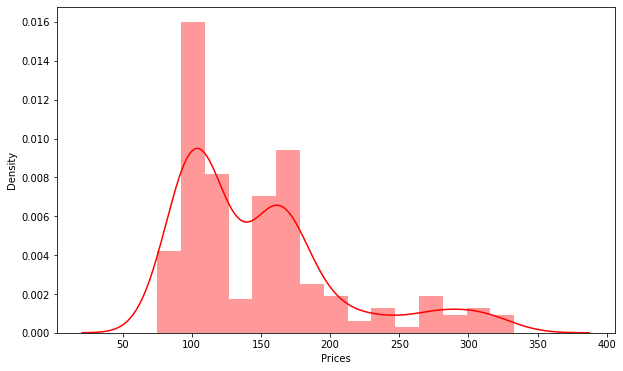

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(price_df['Prices'],color="r")

In [14]:
price_df=price_df.rename(columns={'Date':'ds','Prices':'y'})

In [16]:
price_df

,ds,y
0,01-01-1990,105.900513
1,01-02-1990,106.294167
2,01-03-1990,109.837318
3,01-04-1990,118.498337
4,01-05-1990,121.254097
...,...,...
366,01-07-2020,152.587620
367,01-08-2020,149.393000
368,01-09-2020,166.602533
369,01-10-2020,186.766388


In [18]:
m= Prophet()
m.fit(price_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future=m.make_future_dataframe(periods=365)

In [21]:
future.tail()

,ds
731,2021-01-06
732,2021-01-07
733,2021-01-08
734,2021-01-09
735,2021-01-10


In [22]:
forecast=m.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,105.412211,70.680519,155.692342,105.412211,105.412211,9.705523,9.705523,9.705523,0.150442,0.150442,0.150442,9.555081,9.555081,9.555081,0.0,0.0,0.0,115.117734
1,1990-01-02,105.409780,77.958553,160.790542,105.409780,105.409780,12.871261,12.871261,12.871261,2.345836,2.345836,2.345836,10.525425,10.525425,10.525425,0.0,0.0,0.0,118.281041
2,1990-01-03,105.407350,75.437673,156.226340,105.407350,105.407350,12.555728,12.555728,12.555728,1.663231,1.663231,1.663231,10.892497,10.892497,10.892497,0.0,0.0,0.0,117.963078
3,1990-01-04,105.404919,75.292976,158.508006,105.404919,105.404919,10.882611,10.882611,10.882611,0.162023,0.162023,0.162023,10.720588,10.720588,10.720588,0.0,0.0,0.0,116.287530
4,1990-01-05,105.402488,72.932729,153.496081,105.402488,105.402488,6.816818,6.816818,6.816818,-3.273539,-3.273539,-3.273539,10.090357,10.090357,10.090357,0.0,0.0,0.0,112.219306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2021-01-06,127.559736,97.407285,177.499835,126.370863,128.419680,10.465883,10.465883,10.465883,1.663231,1.663231,1.663231,8.802653,8.802653,8.802653,0.0,0.0,0.0,138.025619
732,2021-01-07,127.528797,94.828954,173.998971,126.334510,128.389475,7.663268,7.663268,7.663268,0.162023,0.162023,0.162023,7.501245,7.501245,7.501245,0.0,0.0,0.0,135.192066
733,2021-01-08,127.497858,85.174533,171.910942,126.298326,128.359269,2.806923,2.806923,2.806923,-3.273539,-3.273539,-3.273539,6.080463,6.080463,6.080463,0.0,0.0,0.0,130.304782
734,2021-01-09,127.466920,89.937240,172.727988,126.262359,128.329064,3.692639,3.692639,3.692639,-0.962703,-0.962703,-0.962703,4.655342,4.655342,4.655342,0.0,0.0,0.0,131.159558


In [24]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
731,2021-01-06,138.025619,97.407285,177.499835
732,2021-01-07,135.192066,94.828954,173.998971
733,2021-01-08,130.304782,85.174533,171.910942
734,2021-01-09,131.159558,89.937240,172.727988
735,2021-01-10,130.690198,89.063562,172.349516


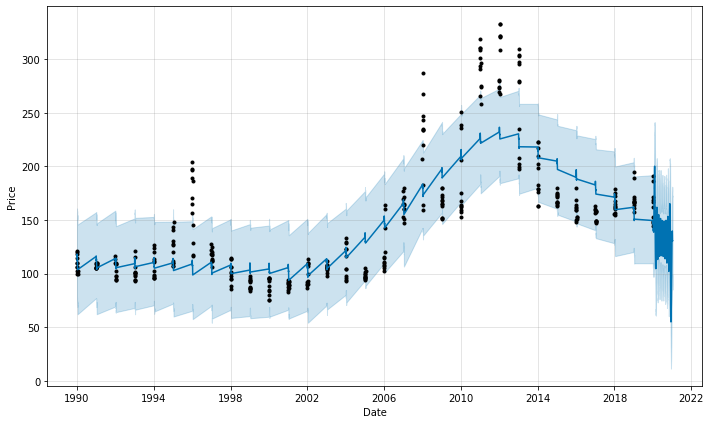

In [25]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

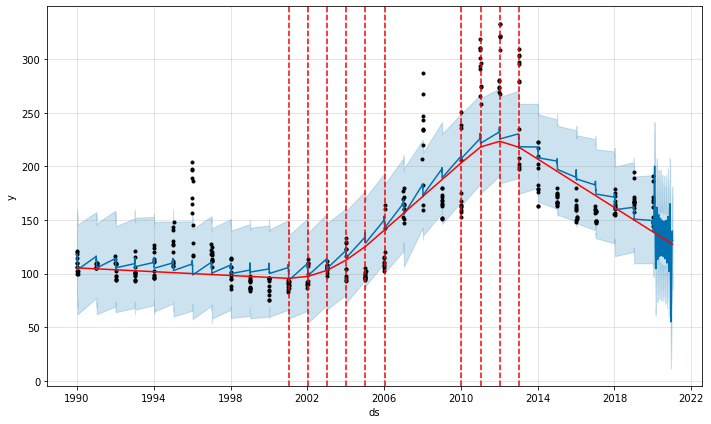

In [26]:

from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)